## YouTube Text & Data Analysis

10/28/2020

---

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

import emoji
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

In [2]:
# Import dataset "YouTube videos"
videos = pd.read_csv('~/Documents/GitHub/various-projects/data/ytvideos.csv', error_bad_lines=False)
videos.head(2)
#videos.shape

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


video_id                                              title  \
0  XpVt6Z1Gjjo  1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...   
1  K4wEI5zhHB0            iPhone X — Introducing iPhone X — Apple   

      channel_title  category_id  \
0  Logan Paul Vlogs           24   
1             Apple           28   

                                                tags    views   likes  \
0  logan paul vlog|logan paul|logan|paul|olympics...  4394029  320053   
1  Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...  7860119  185853   

   dislikes  comment_total                                  thumbnail_link  \
0      5931          46245  https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg   
1     26679              0  https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg   

    date  
0  13.09  
1  13.09

In [3]:
# Import dataset "YouTube comments"
comments = pd.read_csv('~/Documents/GitHub/various-projects/data/ytcomments.csv', error_bad_lines=False)
comments.head(2)

b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'


video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   

  replies  
0       0  
1       0

In [4]:
# Sentiment analysis of YouTube comments

polarity=[] # list which will contain the polarity of the comments
for i in comments['comment_text']:
    try:
        polarity.append(TextBlob(i).sentiment.polarity)   
    except:
        polarity.append(0)
        
comments['polarity'] = polarity

comments.head()

video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   

  replies  polarity  
0       0       0.0  
1       0       0.0  
2       0       0.0  
3       0       0.0  
4       0       0.0

In [5]:
# EDA for the positive sentences 

comments_positive = comments[comments['polarity']==1]
comments_positive.head()

video_id                                       comment_text likes  \
64   XpVt6Z1Gjjo                                    yu are the best     1   
156  cLdxuaxaQwc  Power is the disease.  Care is the cure.  Keep...     0   
227  WYYvHb03Eog  YAS Can't wait to get it! I just need to sell ...     0   
307  sjlHnJvXdQs                                  This is priceless     0   
319  sjlHnJvXdQs                                Summed up perfectly     0   

    replies  polarity  
64        0       1.0  
156       0       1.0  
227       0       1.0  
307       0       1.0  
319       0       1.0

(-0.5, 999.5, 499.5, -0.5)

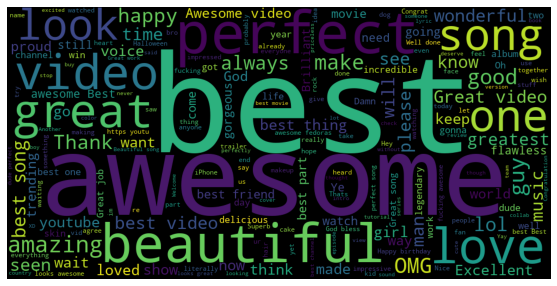

In [6]:
# Wordcloud for positive sentences 

stopwords = set(STOPWORDS)

total_comments= (' '.join(comments_positive['comment_text']))

wordcloud = WordCloud(width = 1000, height = 500,stopwords=stopwords).generate(total_comments)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

In [7]:
# EDA for the negative sentences 

comments_negative = comments[comments['polarity']==-1]

(-0.5, 999.5, 499.5, -0.5)

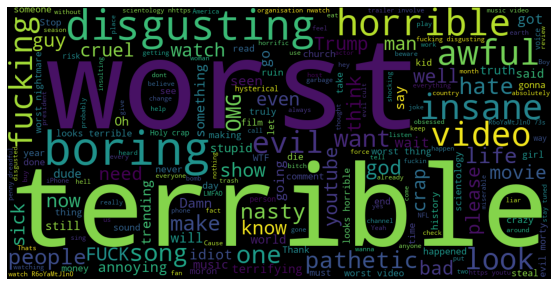

In [8]:
# Wordcloud for negative sentences

comments_negative= (' '.join(comments_negative['comment_text']))
wordcloud = WordCloud(width = 1000, height = 500).generate(comments_negative)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

In [9]:
# Analysing tags column what is trending 

# Joining and making a complete list

tags_complete= (' '.join(videos['tags']))  

import re
tags=re.sub('[^a-zA-Z]',' ',tags_complete)
tags=re.sub(' +',' ',tags)
tags

'logan paul vlog logan paul logan paul olympics logan paul youtube vlog daily comedy hollywood parrot maverick bird maverick clothes diamond play button logan paul diamond play button M subscribers logan paul year vlogging year vlog dwarf mamba play button logan paul history youtube history M M plaque youtube button diamond button logang logang life Apple iPhone iPhone Ten iPhone Portrait Lighting A Bionic augmented reality emoji animoji Face ID Apple Pay camera smartphone none apple iphone x hands on Apple iPhone X iPhone X apple iphone x first look iPhone X first look apple iphone x event apple iphone x event iPhone X price iPhone X specs iPhone X design iPhone X camera iPhone X home button iPhone X wireless charging iPhone X waterproof iPhone X release date iphone apple iphone ios the verge verge jacksfilms parody parodies iphone iphone x iphone apple emoji a a films a trailers independent films trailer HD official movie film a movies oscar winner academy award winner The Disaster A

(-0.5, 999.5, 499.5, -0.5)

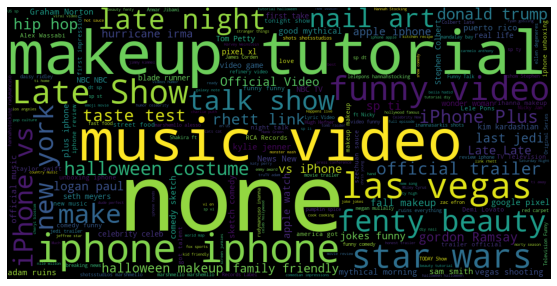

In [10]:
# Wordcloud for tags

wordcloud = WordCloud(width = 1000, height = 500,stopwords=set(STOPWORDS)).generate(tags)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

Text(0.5, 1.0, 'Regression plot for likes & views')

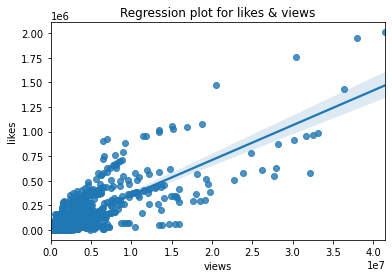

In [11]:
# Regression plot for views & likes

sns.regplot(data=videos,x='views',y='likes')
plt.title("Regression plot for likes & views")

Text(0.5, 1.0, 'Regression plot for dislikes & views')

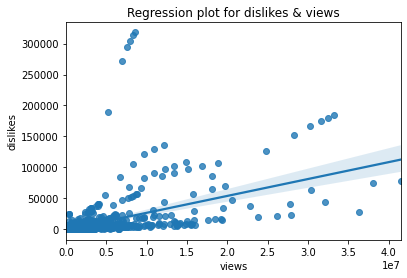

In [12]:
# Regression plot for views & dislikes

sns.regplot(data=videos,x='views',y='dislikes')
plt.title("Regression plot for dislikes & views")

<AxesSubplot:>

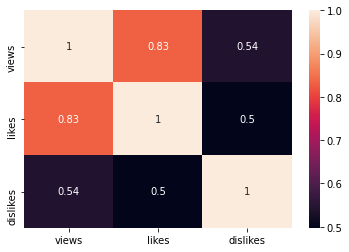

In [13]:
# Correlation matrix 

df_corr = videos[['views','likes','dislikes']]

sns.heatmap(df_corr.corr(),annot=True)

In [14]:
# Analyze emojis in comments

# Drop empty comment_test
comments['comment_text'].dropna(inplace=True)
len(comments)
comments.head()

video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   

  replies  polarity  
0       0       0.0  
1       0       0.0  
2       0       0.0  
3       0       0.0  
4       0       0.0

In [15]:
# Example of emoji extract 

comment='trending 😉'
[c for c in comment if c in emoji.UNICODE_EMOJI]

['😉']

In [16]:
# Function to extract all emojis

def extract_emojis(s):
    return ''.join(c for c in s if c in emoji.UNICODE_EMOJI)

ex_emojis = extract_emojis(comments['comment_text'])
ex_emojis

'👍❤️😂❤️💄🖤💕😒👎🏽🐘💕😎🇺🇸🙏🇺🇸🇺🇸🌞💜😱💕🎈👍😕😻💄💦❤️❤😅💜🤴🏻😍💯❤😑💖❤🙏🏽♥️😂❤️😭💛😝😍❤😍💝👌🌞✌🏻😒👎🏽😂🇺🇸🙏🇺🇸🇺🇸💜😱🎈👍😴👍👍👍❤👍🔥💯🐍🐍😍👍😂👍❤💩😍👍😍💞♥️😻♥😂😃😴👍👍👍❤👍🔥💯🐍🐍😍👍😂👍❤💩😍👍😍💞♥️😻♥😂😃👍🤘🏾👍🙄😂👍👍🎢❤️👍🏾😂😍👍❤❤👌🤢🔥❤️😍🤗😢👍🔥👑😍👍💯❤🐍🐍💞♥️😂😀👌😍👍🤦🏾\u200d♂️💋👋👍😂❤😍❤️😭😍❤️❤💚♥👍🖤💚❤️💿❤️🥀👁😀😂👍🇩🇴❤❣️🔥🔥👑❤❤💛👌🏾🤢👍💚😍❤️🔥😢❤👍💯💖💞♥️🐍🐍👍😇❤️❤️👍🙌😄💕❤👍😎😛💋💯✌❤👍👌😱💖👍😂😂❤❤🎈🎈😍👁🔥👑😳❤💓💛😂👍🎈🤢💟❤️😍🔥❤❤💚🔥👍👍💯🐍🐍💞♥️🙌❤️😕😂😛👍😇😂❤💯👍❤❤👌👍😭❤️💙❤️😄🤢😍😍🤖🇧🇷😍♥😦🎈💖😄👌❤😍❤️❤👍😂🔥👑❤️🎈🎈👍😢🤢💚💟😌❤🔥🔥❤❤❤🙌👎😕👍😇🤥❤❤️🖕🏻😐❤️❤️💄💄🙏😄😀😂❤️😘🐍👍❤💖🌌👍😦😄😊😍❤😂👍🔥👑❤️❤️🎈👍🔥😢🤢😂😭🐢❤️👍🇦🇷🎩👍🇦🇷🎩🔥😢💗❤🙏😄💖👍♥💄🐍❤️😘🐍👍☺😊💀😄😦😄😂😍🙄😂🙁😑😒♥️👍😢😭🎩😂😂❤️😍😞🖤❤️😂🙏😄❤️👍💖❤❤️💄❤️🐍🐍🐍😊👍☺😊😦😍❤️😍🔥♥❤️😔💖🙌🔥♥😍💙❤️❤😍🎈🎈💖💜🙁❤👌🐽❤️💙❤♥️♥❤💯🔥😑😒💎♥♥😩😭😊😲😂😂😎❤❤️😂❤️👍💖😲😂❤️💟😍🙀😂😍😱🙌🔥💜💙💖😍❤️🎈🎈❤💜❤💯🙏🏼👌😂❤🙁🐽❤️👌♥❤😑😒🥀♥️💎😊🤚💕❤️😑😻😎🇹🇷😍❤👍🙌💕🥇😪🤙🏻❄️😆💋♥️😍😍💙🖕🏿😘❤❤🎈🎈❤😍💯🙏🏼🤣❤😂👏💞😍🙌😕💜🙁👍🏽👌😍🐽😑😒♥❤♥️😂🖖😂😍❤️🍻😨😻😂💕🥇❤💋♥👍🙌🙌😻🖕🏿❤😍😘❤️❤️❣🎈😍❤️❤😂🤣👏🙏🏼💯♥️💜🕊😍👍🏽👌❤🙁😍♥❤😑😒🐽😱❤😻😂❤️🌲🎷😳👌😎❤❤️👎🏼😢😭😉❤🇺🇸💕❤😨🎈👍👌🏽💕🥇🙄😻💋♥❤👍😍🚀❤️❤🦊🔥👍🏻🇬🇭😂😈💜👍😂🔥😍👍👌😂😁👎🏼👌😎😢😢❤😉🇺🇸💗❤️❤🙋🎈😊🤑😂😍👍😂❤️💖♥😍👍❤♥💜🤙🏻❤❤️♥🙄❤❤❤️😍❤️👍😂😀👌😁👌😎👎🏼👍😢🐍😢😍❤️❤👍😮🕳🙇❤😍❤💖😂❤️❤❤️❤️😍🤗💖💙♥🌷😍🤣😂😂💪🏽😁♥😆💕❤❤️💜🤘👍👌❤️🖤😂😗💩😇😐🕶💎💚🐱😍👃😂❤💗😂💖😱❤️💖❤😂🙇❤😍❤💜❤️❤️💙😍💘💜🌷💖❤😍❤🤣😂👌❤️❤️😏💪🏽❤️❤❤️👋❤👀🤙😂✔️💚👏👍😺❤️💓😔😂😍😂🙇❤😍❤💜❤✊💜❤️💙😝❤💖❤❤️🤣😂😊😍❤💪🏽❤️❤️😍👋💔😥❤️🐘😒👍❤️👀💙👍😂👍😂😢👍😭👏👍❤😺🐱👍😍👍🙇❤😍❤

In [17]:
# Count of all emojis

len(ex_emojis)

1875

In [18]:
# Count of individual emojis 

ct_emojis = {i : ex_emojis.count(i) for i in set(ex_emojis)} 
ct_emojis

{'🤚': 1,
 '🇴': 1,
 '✊': 1,
 '🐝': 1,
 '💛': 5,
 '🧢': 1,
 '🅱': 1,
 '💜': 28,
 '😑': 9,
 '🌲': 1,
 '🙀': 1,
 '🙄': 4,
 '🕶': 1,
 '😎': 13,
 '😏': 2,
 '😥': 2,
 '🇨': 1,
 '💓': 20,
 '😝': 3,
 '😌': 1,
 '🤔': 2,
 '✔': 1,
 '😆': 2,
 '🤣': 11,
 '✋': 1,
 '🤤': 1,
 '😘': 8,
 '🖕': 10,
 '✌': 4,
 '🇸': 9,
 '👋': 3,
 '❣': 2,
 '👍': 130,
 '🐢': 5,
 '🎢': 1,
 '🙋': 1,
 '😧': 1,
 '🤓': 1,
 '💖': 38,
 '👻': 2,
 '🙃': 2,
 '👀': 3,
 '🤢': 10,
 '👨': 1,
 '🙇': 5,
 '✨': 1,
 '🌞': 2,
 '💞': 7,
 '🇺': 9,
 '😬': 2,
 '▫': 1,
 '🇹': 1,
 '😢': 19,
 '👆': 1,
 '🎈': 21,
 '🇪': 1,
 '😻': 10,
 '🍻': 1,
 '😮': 4,
 '💘': 5,
 '😳': 4,
 '💙': 20,
 '🇬': 1,
 '😺': 3,
 '🐸': 5,
 '🚀': 1,
 '☺': 2,
 '💕': 21,
 '😗': 4,
 '😈': 2,
 '🤑': 1,
 '👑': 6,
 '👁': 2,
 '🐙': 2,
 '🎩': 3,
 '❓': 4,
 '💿': 2,
 '👽': 1,
 '😅': 1,
 '❤': 312,
 '🏻': 19,
 '♥': 56,
 '🤖': 1,
 '💁': 2,
 '🌶': 1,
 '🤗': 4,
 '💦': 1,
 '🌷': 2,
 '💔': 10,
 '💃': 1,
 '😨': 5,
 '💥': 1,
 '™': 1,
 '👅': 1,
 '🍈': 1,
 '😇': 9,
 '😕': 6,
 '🏴': 6,
 '💋': 6,
 '😛': 2,
 '🎃': 4,
 '🙏': 15,
 '️': 189,
 '🏼': 10,
 '🐾': 5,
 '😂': 90,
 '🇦': 3,
 '😃': 2,
 '🌬'

In [19]:
# Sort emojis 

ct_emojis={k: v for k, v in sorted(ct_emojis.items(), key=lambda item: item[1])}
ct_emojis

{'🤚': 1,
 '🇴': 1,
 '✊': 1,
 '🐝': 1,
 '🧢': 1,
 '🅱': 1,
 '🌲': 1,
 '🙀': 1,
 '🕶': 1,
 '🇨': 1,
 '😌': 1,
 '✔': 1,
 '✋': 1,
 '🤤': 1,
 '🎢': 1,
 '🙋': 1,
 '😧': 1,
 '🤓': 1,
 '👨': 1,
 '✨': 1,
 '▫': 1,
 '🇹': 1,
 '👆': 1,
 '🇪': 1,
 '🍻': 1,
 '🇬': 1,
 '🚀': 1,
 '🤑': 1,
 '👽': 1,
 '😅': 1,
 '🤖': 1,
 '🌶': 1,
 '💦': 1,
 '💃': 1,
 '💥': 1,
 '™': 1,
 '👅': 1,
 '🍈': 1,
 '🌬': 1,
 '🐉': 1,
 '🐦': 1,
 '💀': 1,
 '❄': 1,
 '🕊': 1,
 '🎷': 1,
 '☹': 1,
 '🤴': 1,
 '😩': 1,
 '🕳': 1,
 '🇭': 1,
 '🦌': 1,
 '😹': 1,
 '🎣': 1,
 '🦊': 1,
 '🍆': 1,
 '🔑': 1,
 '😵': 1,
 '😪': 1,
 '🍪': 1,
 '🙊': 1,
 '🐶': 1,
 '☠': 1,
 '🥜': 1,
 '🔧': 1,
 '🖖': 1,
 '🇿': 1,
 '🤥': 1,
 '🌌': 1,
 '🍷': 1,
 '👃': 1,
 '🤞': 1,
 '☄': 1,
 '😏': 2,
 '😥': 2,
 '🤔': 2,
 '😆': 2,
 '❣': 2,
 '👻': 2,
 '🙃': 2,
 '🌞': 2,
 '😬': 2,
 '☺': 2,
 '😈': 2,
 '👁': 2,
 '🐙': 2,
 '💿': 2,
 '💁': 2,
 '🌷': 2,
 '😛': 2,
 '😃': 2,
 '💝': 2,
 '🇱': 2,
 '😜': 2,
 '🦄': 2,
 '😙': 2,
 '🐘': 2,
 '🥀': 2,
 '😞': 2,
 '😝': 3,
 '👋': 3,
 '👀': 3,
 '😺': 3,
 '🎩': 3,
 '🇦': 3,
 '🏿': 3,
 '🥇': 3,
 '💪': 3,
 '🐱': 3,
 '🤙': 3,
 '💎': 3,
 '🇩': 3,
 

In [26]:
# Create dataframe

keys = [*ct_emojis.keys()]
values = [*ct_emojis.values()]

df_emojis = pd.DataFrame({'chars':keys[-20:], 'num':values[-20:]})
df_emojis

chars  num
0      😒   14
1      🙏   15
2      💯   15
3      😢   19
4      🏻   19
5      💓   20
6      💙   20
7      🎈   21
8      💕   21
9      🐍   23
10     👌   24
11     💜   28
12     🔥   28
13     💖   38
14     ♥   56
15     😂   90
16     😍  120
17     👍  130
18     ️  189
19     ❤  312

In [30]:
# Drop raw # 19

df_new_emojis = df_emojis.drop(df_emojis.index[-2])
df_new_emojis

chars  num
0      😒   14
1      🙏   15
2      💯   15
3      😢   19
4      🏻   19
5      💓   20
6      💙   20
7      🎈   21
8      💕   21
9      🐍   23
10     👌   24
11     💜   28
12     🔥   28
13     💖   38
14     ♥   56
15     😂   90
16     😍  120
17     👍  130
19     ❤  312

In [29]:
# Grapthical respresentation 

import plotly.graph_objs as go
from plotly.offline import iplot

trace=go.Bar(x = df_new_emojis['chars'],
             y = df_new_emojis['num']
            )
iplot([trace]) 